In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import json
from itertools import permutations
import matplotlib.pyplot as plt

In [19]:
#Boston
jsonreader = open('./Result/Code_Result/Boston_k_centers8-22_ab.json','r')
Boston_k_8 = json.load(jsonreader)
jsonreader.close()

#BuenosAIres
jsonreader = open('./Result/Code_Result/BuenosAires_k_centers8-22_ab.json','r')
BuenosAiers_k_8 = json.load(jsonreader)
jsonreader.close()

#Brussels
jsonreader = open('./Result/Code_Result/Brussels_k_centers8-22_ab.json','r')
Brussels_k_8 = json.load(jsonreader)
jsonreader.close()

#LosAngeles
jsonreader = open('./Result/Code_Result/LosAngeles_k_centers8-22_ab.json','r')
LosAngeles_k_8 = json.load(jsonreader)
jsonreader.close()

In [20]:
#Boston
jsonreader = open('./Result/Kmean_centers/Boston_k_centers24-28_ab.json','r')
Boston_k_24 = json.load(jsonreader)
jsonreader.close()

#BuenosAIres
jsonreader = open('./Result/Kmean_centers/BuenosAires_k_centers24-28_ab.json','r')
BuenosAiers_k_24 = json.load(jsonreader)
jsonreader.close()

#Brussels
jsonreader = open('./Result/Kmean_centers/Brussels_k_centers24-28_ab.json','r')
Brussels_k_24 = json.load(jsonreader)
jsonreader.close()

#LosAngeles
jsonreader = open('./Result/Kmean_centers/LosAngeles_k_centers24-28_ab.json','r')
LosAngeles_k_24 = json.load(jsonreader)
jsonreader.close()

In [21]:
cities_dict_8 = {
    'Boston':Boston_k_8,
    'BuenosAires':BuenosAiers_k_8,
    'Brussels':Brussels_k_8,
    'LosAngeles':LosAngeles_k_8
}

In [22]:
cities_dict_24 = {
    'Boston':Boston_k_24,
    'BuenosAires':BuenosAiers_k_24,
    'Brussels':Brussels_k_24,
    'LosAngeles':LosAngeles_k_24
}

In [23]:
cities_8_28 = {}

In [24]:
for cities_combo in list(cities_dict_8.keys()):
    cities_8_28[cities_combo] = cities_dict_8[cities_combo] + cities_dict_24[cities_combo]

In [5]:
cities = list(cities_dict.keys())

In [6]:
from itertools import permutations

def custom_permutations(city_list,num):
    n = len(city_list)
    lists = []
    for indices in permutations(range(n),num):
        sublist = [city_list[i] for i in indices]
        if sublist[::-1] not in lists:
            lists.append(sublist)
    return lists
cities_combos = custom_permutations(cities,num=2)

In [7]:
def dis_count(cities_dict,cites_combos,num):
    dis_dist = {}
    for cites_combo in cites_combos:
        dis_list = []
        combo = tuple(cites_combo)
        for k in range(num):
            city1_np = np.array(cities_dict[cites_combo[0]][k]) / 255
            city2_np = np.array(cities_dict[cites_combo[1]][k]) / 255
            dist = np.sum(np.sqrt(np.sum((city1_np - city2_np)**2,axis=1)),axis=0)
            dis_list.append(dist)

        dis_dist[combo] = dis_list


    return dis_dist

In [25]:
cities_8_28 = dis_count(cities_8_28,cities_combos,num=11)

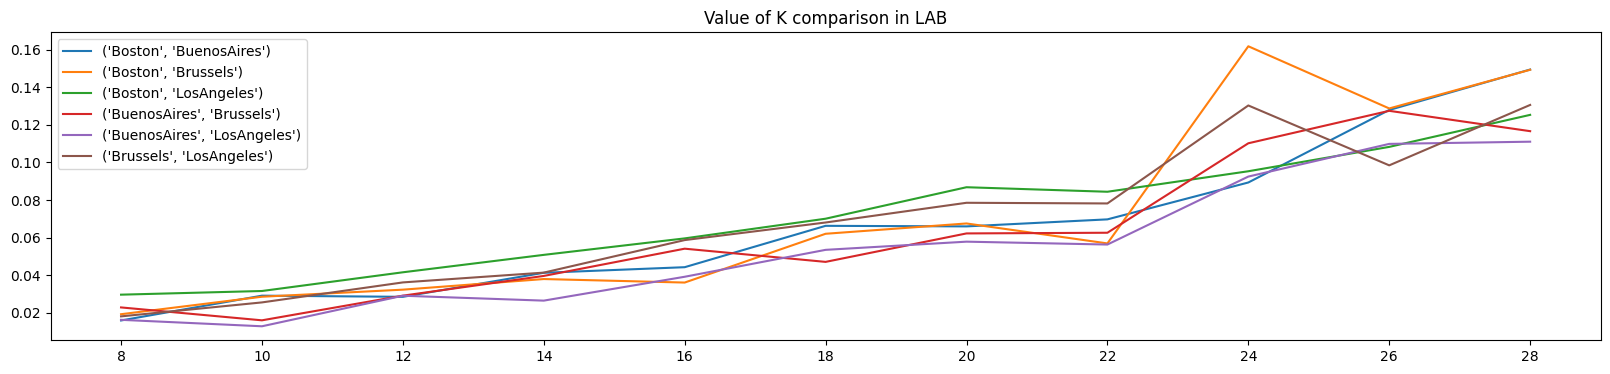

In [27]:
plt.figure(figsize=(20,4))
for cities_combo in list(cities_8_28.keys()):
    plt.plot(np.array(cities_8_28[cities_combo])/len(cities_8_28[cities_combo]),label = cities_combo)

plt.xticks(range(0,11),range(8,30,2))
plt.title('Value of K comparison in LAB')
plt.legend()
plt.savefig('./Result/K_comparison_ab.png')
plt.show()

In [8]:
test_BuenosAires = np.array(BuenosAiers_k[0]).reshape(1,-1,3)
test_LA = np.array(LosAngeles_k[0]).reshape(1,-1,3)

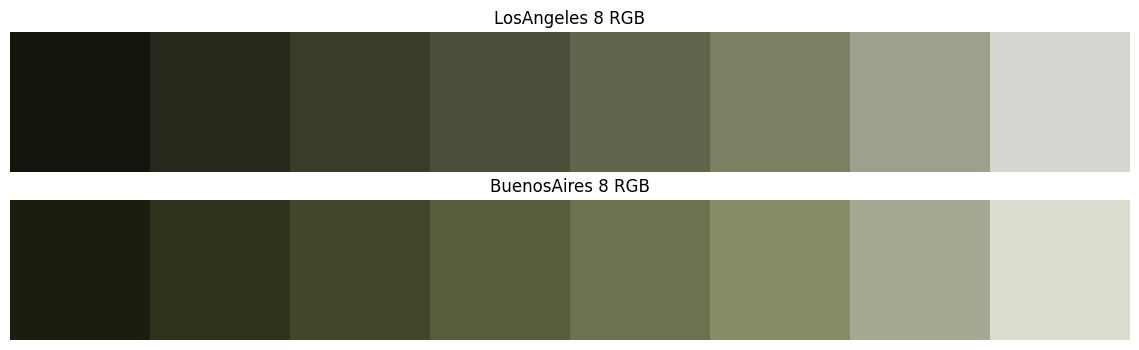

In [9]:
plt.subplot(211),plt.title('LosAngeles 8 RGB'),plt.imshow(test_LA/255),plt.axis('off')
plt.subplot(212),plt.title('BuenosAires 8 RGB'),plt.imshow(test_BuenosAires/255),plt.axis('off')
plt.savefig('./Result/LosandBue_k=8_rgb.png')
plt.show()


In [11]:
np.sum((np.array(BuenosAiers_k[0])/255 - np.array(LosAngeles_k[0])/255) ** 2,axis=1)

array([0.00177042, 0.00317754, 0.00338338, 0.00468612, 0.00470635,
       0.00437931, 0.00238679, 0.00122794])

In [12]:
np.sum((np.array(BuenosAiers_k[0])/255 - np.array(Brussels_k[0])/255) ** 2,axis=1)

array([4.81992501e-04, 8.37785134e-05, 8.64324041e-04, 6.41043835e-03,
       1.27105623e-02, 1.96909677e-03, 3.86620516e-04, 5.97148723e-04])

# Path to Images /Users/zhxzhang/DataspellProjects/Image_Dataset/Spring/Spring

In [13]:
#Boston
jsonreader = open('./Result/Kmean_centers/Boston_k_centers17-22.json','r')
Boston_k_17 = json.load(jsonreader)
jsonreader.close()

#BuenosAIres
jsonreader = open('./Result/Kmean_centers/BuenosAIres_k_centers17-22.json','r')
BuenosAiers_k_17 = json.load(jsonreader)
jsonreader.close()

#Brussels
jsonreader = open('./Result/Kmean_centers/Brussels_k_centers17-22.json','r')
Brussels_k_17 = json.load(jsonreader)
jsonreader.close()

#LosAngeles
jsonreader = open('./Result/Kmean_centers/LosAngeles_k_centers17-22.json','r')
LosAngeles_k_17 = json.load(jsonreader)
jsonreader.close()

In [14]:
cities_dict_17= {
    'Boston':Boston_k_17,
    'BuenosAires':BuenosAiers_k_17,
    'Brussels':Brussels_k_17,
    'LosAngeles':LosAngeles_k_17
}

In [15]:
cities = list(cities_dict_17.keys())

In [16]:
cities_17 = dis_count(cities_dict_17,cities_combos,6)

In [17]:
cities_8_22 = {}

In [18]:
for cities_combo in list(cities_17.keys()):
    cities_8_22[cities_combo] = cities_8[cities_combo] + cities_17[cities_combo]

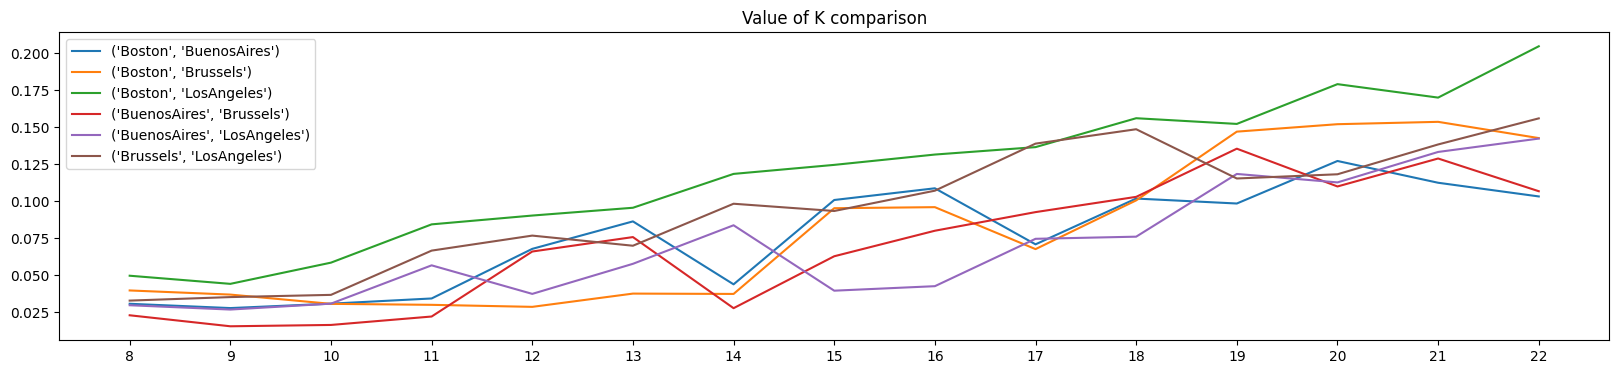

In [26]:
plt.figure(figsize=(20,4))
for cities_combo in list(cities_8_22.keys()):
    plt.plot(np.array(cities_8_22[cities_combo])/len(cities_8_22[cities_combo]),label = cities_combo)

plt.xticks(range(0,15),range(8,23))
plt.title('Value of K comparison')
plt.legend()
plt.savefig('./Result/K_comparison.png')
plt.show()